### Problem 1: Energy Efficiency in Buildings

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

In [74]:
pip install ucimlrepo

In [75]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
energy_efficiency = fetch_ucirepo(id=242)

# data (as pandas dataframes)
features = energy_efficiency.data.features
targets = energy_efficiency.data.targets

# metadata
print(energy_efficiency.metadata)

# variable information
print(energy_efficiency.variables)

{'uci_id': 242, 'name': 'Energy Efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'ID': 379, 'type': 'NATIVE', 'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine 

In [76]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,:].to_numpy(), targets.iloc[:,0].to_numpy()

# Split the samples into 60% Training, 20% Validation, and 20% Testing data at random.
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)

In [77]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(460, 8)
(154, 8)
(154, 8)


In [78]:
# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
# 10 choices of regularization
for alpha in np.array([0, 0.001, 0.01, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

Alpha: 0.0
	Coefficients: [-5.93624728e+00  5.81533216e+13 -2.92024618e+13 -5.96587274e+13
  7.48491828e+00 -2.62322836e-01  2.52599191e+00  2.32298629e-01]
	Intercept: 22.369849071810318
	Training accuracy (R2): 0.9239583860988857
	Validation accuracy (R2): 0.9081791840383303
	Testing accuracy (R2): 0.8934313501527058
Alpha: 0.001
	Coefficients: [-5.93451702 -3.18578276  0.82778905 -3.51058993  7.53186822 -0.09785126
  2.52230988  0.27823879]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241944125357854
	Validation accuracy (R2): 0.9089146794641805
	Testing accuracy (R2): 0.8948208807883766
Alpha: 0.01
	Coefficients: [-5.91901124 -3.17547818  0.83056755 -3.50190542  7.53538495 -0.09790936
  2.52225109  0.27820804]
	Intercept: 22.315260869565197
	Training accuracy (R2): 0.9241943830038306
	Validation accuracy (R2): 0.9089099900704081
	Testing accuracy (R2): 0.8948113598709939
Alpha: 0.1
	Coefficients: [-5.77024842 -3.07711482  0.85744571 -3.41918077  7.56798826 -0.09847385

In [79]:
from statistics import stdev, mean
x_transpose = x.transpose()
std_list = []
mean_list = []
for i in range(x_transpose.shape[0]):
    std_list.append(stdev(x_transpose[i]))
    mean_list.append(mean(x_transpose[i]))

Best alpha: 0.001
Coefficients: [-5.93451702 -3.18578276  0.82778905 -3.51058993  7.53186822 -0.09785126
  2.52230988  0.27823879]
Intercept: 22.315260869565197
-5.934517016938225 0.7641666666666667 0.10577747587475192
-3.1857827631876114 671.7083333333334 88.08611605586836
0.827789046191121 318.5 43.6264814379949
-3.510589931519458 176.60416666666666 45.16595022292048
7.531868216584912 5.25 1.7511404367453496
-0.09785126140465832 3.5 1.1187625870603635
2.522309881946846 0.234375 0.13322056291470774
0.2782387923010113 2.8125 1.5509596642247507
Normalized coefficients: [np.float64(-63.32807271310397), np.float64(-7.66175359200162), np.float64(-7.281637218562023), np.float64(-3.987843844958737), np.float64(1.3030755093668942), np.float64(-3.215920252444529), np.float64(17.174037039699783), np.float64(-1.63399556168712)]
Last 5 values are most important: [3 2 1 6 0]
Training accuracy (R2) of Best Model: 0.9241944125357854
Validation accuracy (R2) of Best Model: 0.9089146794641805
Testing 

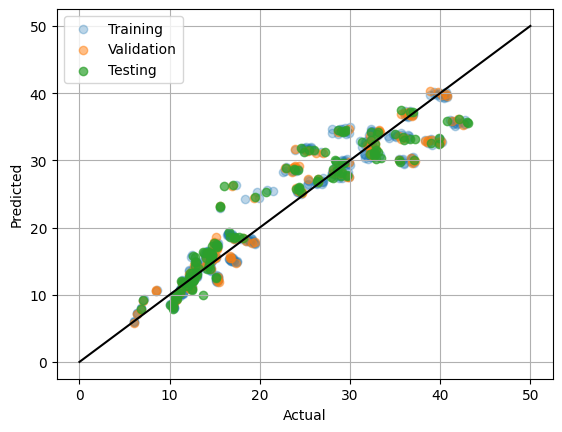

In [80]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

normalized_coefficients = []
for i in range(len(best_mdl[1].coef_)):
    print(best_mdl[1].coef_[i], mean_list[i], std_list[i])
    normalized_coefficients.append((best_mdl[1].coef_[i] - mean_list[i]) / std_list[i])
print(f"Normalized coefficients: {normalized_coefficients}")
order = abs(np.array(normalized_coefficients)).argsort()
print(f"Last 5 values are most important: {order[-5:]}")

# Plot the Actual vs. Predicted values
train_R2 = best_mdl.score(X_train,y_train)
val_R2 = best_mdl.score(X_val,y_val)
test_R2 = best_mdl.score(X_test,y_test)
print(f"Training accuracy (R2) of Best Model: {train_R2}")
print(f"Validation accuracy (R2) of Best Model: {val_R2}")
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

### (b) Based on your answer in item (a), what are the top 5 features among X1 to X8? If you repeat the procedure above using only the 5 top features, what are the results?

In [81]:
# Extract the regressors and the target from the data frame
x, y = features.iloc[:,[3,2,1,6,0]].to_numpy(), targets.iloc[:, 0].to_numpy()

# Hold out the validation and test data
X_train, X_2, y_train, y_2 = train_test_split(x, y, test_size=0.4, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_2, y_2, test_size=0.5, random_state=0)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

# Search over different regularization parameter values
max_R2 = 0
best_alpha = 0
best_mdl = 0
for alpha in np.array([0, 0.1, 0.5, 1, 5, 10, 50, 100]):
    mdl = make_pipeline(StandardScaler(),
                        Ridge(alpha=alpha)).fit(X_train,y_train)
    print(f"Alpha: {alpha}")
    train_R2 = mdl.score(X_train,y_train)
    val_R2 = mdl.score(X_val,y_val)
    test_R2 = mdl.score(X_test,y_test)
    print(f"\tCoefficients: {mdl[1].coef_}")
    print(f"\tIntercept: {mdl[1].intercept_}")
    print(f"\tTraining accuracy (R2): {train_R2}")
    print(f"\tValidation accuracy (R2): {val_R2}")
    print(f"\tTesting accuracy (R2): {test_R2}")
    if val_R2 > max_R2:
        max_R2 = val_R2
        best_alpha = alpha
        best_mdl = mdl

(460, 5)
(154, 5)
(154, 5)
Alpha: 0.0
	Coefficients: [-1.60343596e+14 -7.84868860e+13  1.56297546e+14  2.60014557e+00
 -1.41121047e+01]
	Intercept: 22.461976514352827
	Training accuracy (R2): 0.9052832693758663
	Validation accuracy (R2): 0.8832551189385238
	Testing accuracy (R2): 0.887176696190281
Alpha: 0.1
	Coefficients: [-10.93102962   0.57633192 -10.92458673   2.61174795 -13.80038768]
	Intercept: 22.31526086956518
	Training accuracy (R2): 0.9055744877885294
	Validation accuracy (R2): 0.8832351027432771
	Testing accuracy (R2): 0.887760876473275
Alpha: 0.5
	Coefficients: [-10.37273391   0.86187002 -10.20845177   2.60885734 -12.5364812 ]
	Intercept: 22.315260869565183
	Training accuracy (R2): 0.9052030135206189
	Validation accuracy (R2): 0.8815734861453783
	Testing accuracy (R2): 0.8863575086770138
Alpha: 1.0
	Coefficients: [ -9.78904354   1.15955969  -9.46016268   2.60541518 -11.21601513]
	Intercept: 22.315260869565186
	Training accuracy (R2): 0.9043045398721163
	Validation accuracy 

Best alpha: 0.0
Coefficients: [-1.60343596e+14 -7.84868860e+13  1.56297546e+14  2.60014557e+00
 -1.41121047e+01]
Intercept: 22.461976514352827
Training accuracy (R2) of Best Model: 0.9052832693758663
Validation accuracy (R2) of Best Model: 0.8832551189385238
Testing accuracy (R2) of Best Model: 0.887176696190281


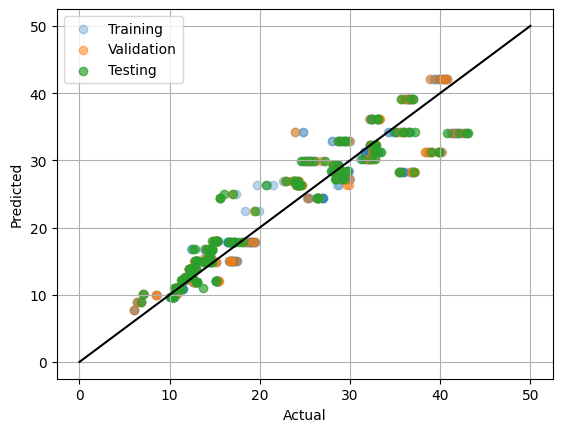

In [82]:
# Print results of the best model
print(f"Best alpha: {best_alpha}")
print(f"Coefficients: {best_mdl[1].coef_}")
print(f"Intercept: {best_mdl[1].intercept_}")

# Plot the Actual vs. Predicted values
train_R2 = best_mdl.score(X_train,y_train)
val_R2 = best_mdl.score(X_val,y_val)
test_R2 = best_mdl.score(X_test,y_test)
print(f"Training accuracy (R2) of Best Model: {train_R2}")
print(f"Validation accuracy (R2) of Best Model: {val_R2}")
print(f"Testing accuracy (R2) of Best Model: {test_R2}")
y_train_pred = best_mdl.predict(X_train)
y_val_pred = best_mdl.predict(X_val)
y_test_pred = best_mdl.predict(X_test)
plt.plot(np.array([0, 50]),np.array([0, 50]),color='k',label='_nolegend_')
plt.scatter(y_train, y_train_pred, alpha=0.3, label="Training")
plt.scatter(y_val, y_val_pred, alpha=0.5, label="Validation")
plt.scatter(y_test, y_test_pred, alpha=0.7, label="Testing")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

### Answers for a:

a. What is the best model’s coefficients,
intercept, and its training, validation, and test accuracy?

Best alpha: 0.001

Coefficients: [-5.93451702 -3.18578276  0.82778905 -3.51058993  7.53186822 -0.09785126 2.52230988  0.27823879]

Intercept: 22.315260869565197

Training accuracy (R2) of Best Model: 0.9052832693758663

Validation accuracy (R2) of Best Model: 0.8832551189385238

Testing accuracy (R2) of Best Model: 0.887176696190281


### Answers for b:

b. Based on your answer in item (a), what are the top 5 features among X1 to X8? If you repeat the procedure above using only the 5 top features, what are the results?

The top 5 features are X [3 2 1 6 0].

Repeating the process using only the top 5 features, we have that:

Best alpha: 0.0

Coefficients: [-1.60343596e+14 -7.84868860e+13  1.56297546e+14  2.60014557e+00 -1.41121047e+01]

Intercept: 22.461976514352827

Training accuracy (R2) of Best Model: 0.9052832693758663

Validation accuracy (R2) of Best Model: 0.8832551189385238

Testing accuracy (R2) of Best Model: 0.887176696190281

### Problem 2: Classifying Breast Tumors

In [83]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
features = breast_cancer_wisconsin_diagnostic.data.features
targets = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [84]:
# Split the samples into 70% Training and 30% Testing at random. Make sure to use “stratify=y” in the test_train_split function.
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.3, random_state=0, stratify=targets)

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [86]:
model = LogisticRegression(solver='newton-cg', random_state=0,penalty=None).fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Training

In [87]:
ypred_train = model.predict(X_train)
print(f"Training accuracy = {model.score(X_train, y_train)}")

Training accuracy = 0.9974874371859297


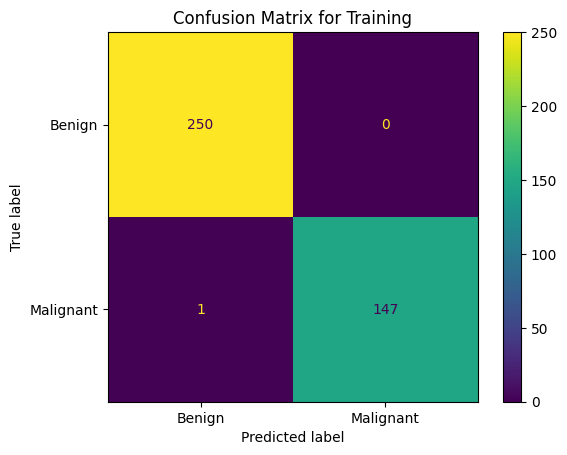

Training F1 Score: 0.9966101694915255
Training Precision Score: 1.0
Training Recall Score: 0.9932432432432432


In [88]:
# Plot training
cfm = confusion_matrix(y_train, ypred_train)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Training')
plt.show()
training_f1_score = f1_score(y_train, ypred_train, pos_label='M')
training_precision_score = precision_score(y_train, ypred_train, pos_label='M')
training_recall_score = recall_score(y_train, ypred_train, pos_label='M')
print(f"Training F1 Score: {training_f1_score}")
print(f"Training Precision Score: {training_precision_score}")
print(f"Training Recall Score: {training_recall_score}")

AUC:  0.9995945945945945


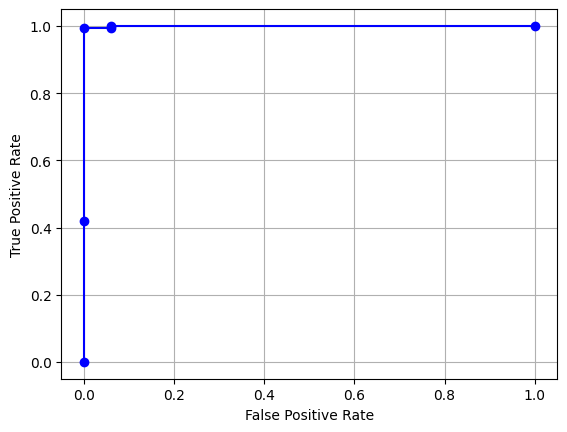

In [89]:
from sklearn import metrics

# Use the predicted probabilities for the positive class (Malignant, 'M')
y2 = model.predict_proba(X_train)

y_train_bin = (y_train == 'M').astype(int)
y_train_bin_values = y_train_bin['Diagnosis'].values

fpr, tpr, thresholds = metrics.roc_curve(y_train_bin_values, y2[:, 1])
print(f"AUC: ", metrics.roc_auc_score(y_train_bin_values, y2[:, 1]))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

### Testing

In [90]:
ypred_test = model.predict(X_test)
print(f"Test accuracy = {model.score(X_test, y_test)}")

Test accuracy = 0.9532163742690059


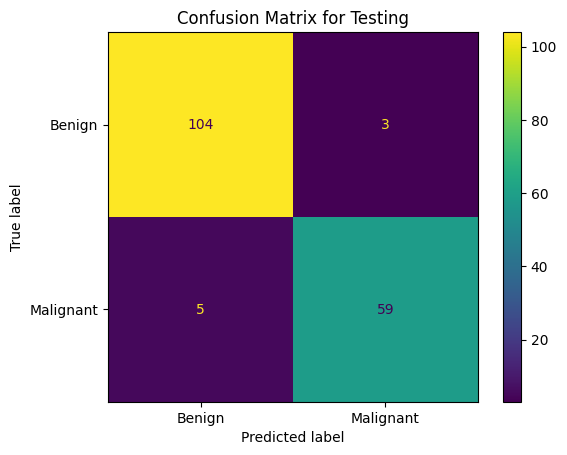

Testing F1 Score: 0.9365079365079365
Testing Precision Score: 0.9516129032258065
Testing Recall Score: 0.921875


In [93]:
# Plot testing
cfm = confusion_matrix(y_test, ypred_test)
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = ["Benign", "Malignant"])
cm_display.plot()
plt.title('Confusion Matrix for Testing')
plt.show()
test_f1_score = f1_score(y_test, ypred_test, pos_label='M')
test_precision_score = precision_score(y_test, ypred_test, pos_label='M')
test_recall_score = recall_score(y_test, ypred_test, pos_label='M')
print(f"Testing F1 Score: {test_f1_score}")
print(f"Testing Precision Score: {test_precision_score}")
print(f"Testing Recall Score: {test_recall_score}")

AUC:  0.990070093457944


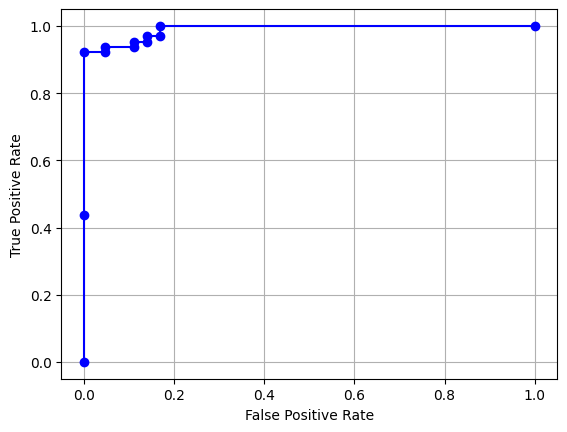

In [92]:
from sklearn import metrics

# Use the predicted probabilities for the positive class (Malignant, 'M')
y2 = model.predict_proba(X_test)

y_test_bin = (y_test == 'M').astype(int)
y_test_bin_values = y_test_bin['Diagnosis'].values

fpr, tpr, thresholds = metrics.roc_curve(y_test_bin_values, y2[:, 1])
print(f"AUC: ", metrics.roc_auc_score(y_test_bin_values, y2[:, 1]))
plt.plot(fpr, tpr, 'b-o')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.show()

### Answers for a:

(a) After fitting the data, what is the model’s training and testing accuracy? Which features are most important?

Training accuracy = 0.9974874371859297

Testing accuracy = 0.9532163742690059

Which features are most important?

### Answers for b:

(b) From your answer in item (a), generate a confusion matrix, then calculate the other metrics: F1-score, Precision, Recall, and False alarm rate. Finally, plot the ROC curve and reportthe AUC. For this item, make a result for both the training and testing data, separately.

**Training**

Training F1 Score: 0.9966101694915255

Training Precision Score: 1.0

Training Recall Score: 0.9932432432432432

**Testing**

Testing F1 Score: 0.9365079365079365

Testing Precision Score: 0.9516129032258065

Testing Recall Score: 0.921875